# Stock Price Predictor

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
stocks = input("Enter the stock code: ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the stock code: GC=F
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,21


In [3]:
data.shape

(3281, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3281 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3281 non-null   float64
 1   High    3281 non-null   float64
 2   Low     3281 non-null   float64
 3   Close   3281 non-null   float64
 4   Volume  3281 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3281.000000,3281.000000,3281.000000,3281.000000,3281.000000
mean,1316.287291,1323.427614,1308.463700,1316.037885,5606.854008
std,262.732678,264.022456,261.294638,262.754237,29568.392331
min,705.000000,715.500000,681.000000,704.900024,0.000000
25%,1183.400024,1189.400024,1176.199951,1183.400024,41.000000
50%,1282.500000,1287.099976,1277.800049,1282.099976,137.000000
75%,1486.199951,1491.599976,1477.300049,1484.000000,442.000000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


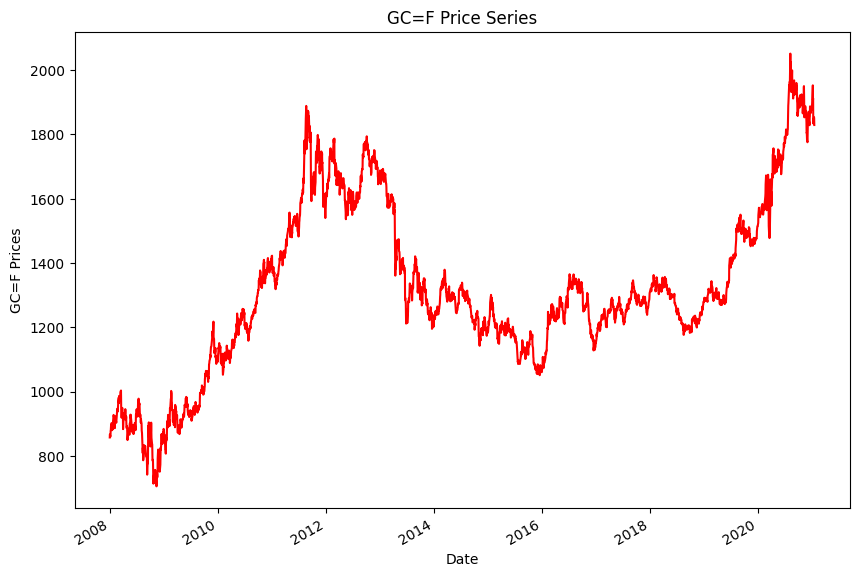

In [6]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

## Exploratory Data Analysis

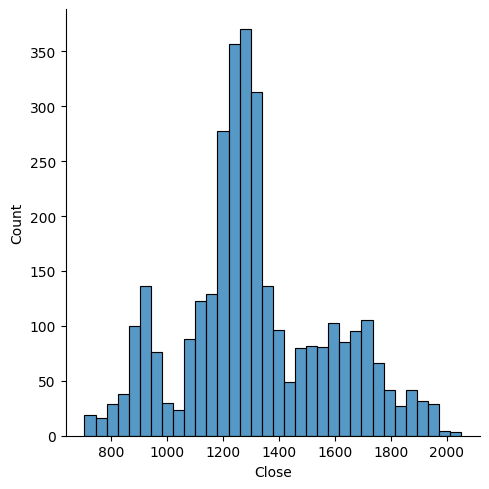

In [7]:
sns.displot(data['Close'])

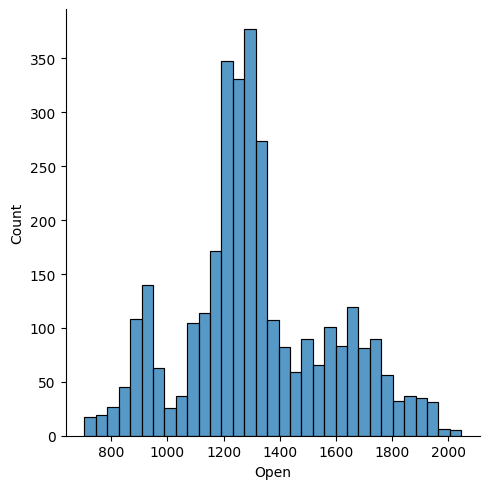

In [8]:
sns.displot(data['Open'])

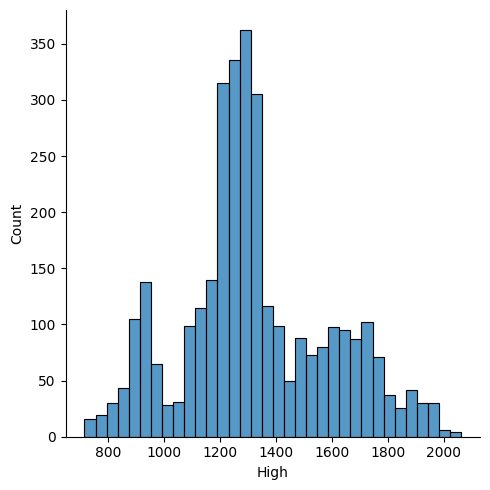

In [9]:
sns.displot(data['High'])

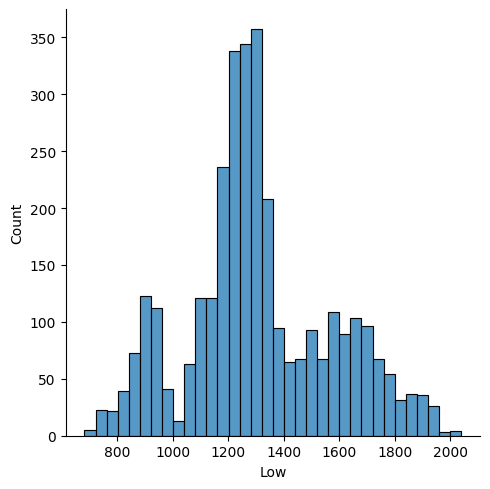

In [10]:
sns.displot(data['Low'])

## Split Data

In [11]:
X = data.drop("Close", axis=1)
y = data['Close']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

### Evaluation

In [13]:
# MSE, RMSE, r_squared
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scor = r2_score(y_test, y_pred)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2_score: ", r2_scor)


calculate_metrics(y_test, pred1)

MSE:  27.47231229899245
RMSE:  5.241403657322382
R2_score:  0.9995883344184747


## Regularized Linear Models

In [14]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

C:\Users\CHARLES\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.847e+04, tolerance: 1.826e+04
  model = cd_fast.enet_coordinate_descent(


In [15]:
calculate_metrics(y_test, la_p)

MSE:  46.190175348279254
RMSE:  6.796335435238556
R2_score:  0.9993078520224814


In [16]:
calculate_metrics(y_test, ri_p)

MSE:  27.47234270543723
RMSE:  5.241406557922905
R2_score:  0.9995883339628419


## Support Vector Machine

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {
        'C':[0.1, 1, 10, 100, 1000],
        'kernel' : ["rbf"],
        'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]
         }

grid = GridSearchCV(svr, param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [18]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001)

In [19]:
svr_fit = SVR(C=1000, gamma=0.0001, kernel="rbf")
svr_fit.fit(X_train, y_train)
svr_pred = svr_fit.predict(X_test)

In [20]:
calculate_metrics(y_test, svr_pred)

MSE:  5491.624716457687
RMSE:  74.1054972080863
R2_score:  0.9177094065539461


In [21]:
import joblib

joblib.dump(ri, 'model.pkl')

ridge_from_joblib = model = joblib.load("model.pkl")